<a href="https://colab.research.google.com/github/shauryapanhale/skill2/blob/main/SKILL_LCA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I have used Iot-Bot dataset, i have taken parts from 3-4 csv files and made my own random dataset to perform my micro project for lca 3

EXPERIMENT 1: Loading and merging dataset

step 1: importing libraries

In [7]:
import pandas as pd
import os

step 2: load all the csv file

In [8]:
# Load the CSV file
df = pd.read_csv('/content/final_data.csv')
# Preview the data
print("Shape:", df.shape)
df.head()

Shape: (9716, 35)


,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,...,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
0,500,1526344333,e,tcp,192.168.100.150,36663.0,192.168.100.3,5811.0,2,120,...,1,1,60,60,21276.59570,0.0,0.0,1,Reconnaissance,Service_Scan
1,501,1526344333,e,tcp,192.168.100.150,36663.0,192.168.100.3,843.0,2,120,...,1,1,60,60,19607.84375,0.0,0.0,1,Reconnaissance,Service_Scan
2,502,1526344333,e,tcp,192.168.100.150,36663.0,192.168.100.3,45100.0,2,120,...,1,1,60,60,20000.00000,0.0,0.0,1,Reconnaissance,Service_Scan
3,503,1526344333,e,tcp,192.168.100.150,36663.0,192.168.100.3,5510.0,2,120,...,1,1,60,60,22727.27344,0.0,0.0,1,Reconnaissance,Service_Scan
4,504,1526344333,e,tcp,192.168.100.150,36663.0,192.168.100.3,61900.0,2,120,...,1,1,60,60,22727.27344,0.0,0.0,1,Reconnaissance,Service_Scan


Experimen 2: data cleaning

step 1: check basic info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9716 entries, 0 to 9715
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pkSeqID       9716 non-null   int64  
 1   stime         9716 non-null   int64  
 2   flgs          9716 non-null   object 
 3   proto         9716 non-null   object 
 4   saddr         9716 non-null   object 
 5   sport         9710 non-null   float64
 6   daddr         9716 non-null   object 
 7   dport         9710 non-null   float64
 8   pkts          9716 non-null   int64  
 9   bytes         9716 non-null   int64  
 10  state         9716 non-null   object 
 11  ltime         9716 non-null   int64  
 12  seq           9716 non-null   int64  
 13  dur           9716 non-null   float64
 14  mean          9716 non-null   float64
 15  stddev        9716 non-null   float64
 16  smac          0 non-null      float64
 17  dmac          0 non-null      float64
 18  sum           9716 non-null 

step 2: drop columns with no usefull data

In [10]:
columns_to_drop = ['smac', 'dmac', 'soui', 'doui', 'sco', 'dco']
df.drop(columns=columns_to_drop, inplace=True)

step 3: fill in the empty places with means of their column

In [11]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

step 4: remove duplicate rows

In [12]:
df.drop_duplicates(inplace=True)

step 4: removing null values

In [13]:
df.dropna(inplace=True)

step 5: now there shud be no null values

In [14]:
print("After cleaning, shape:", df.shape)
df.isnull().sum()

After cleaning, shape: (9716, 29)


,0
pkSeqID,0
stime,0
flgs,0
proto,0
saddr,0
sport,0
daddr,0
dport,0
pkts,0
bytes,0


Experiment 3: Implement encoding techniques

step 1: label encoding

label encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
label_cols = ['category', 'subcategory ']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

step 2: one-hot encoding

In [16]:
one_hot_cols = ['proto', 'flgs', 'state']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=False)

Experiment 4: normalizing and feature scaling

step 1: seperate features and target

In [17]:
X = df.drop(columns=['category'])  # Features
y = df['category']                 # Target


step 2: first i might have to remove non- numeric columns

In [18]:
non_numeric = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric.tolist())

Non-numeric columns: ['saddr', 'daddr']


In [19]:
X_numeric = X.drop(non_numeric, axis=1)
print(X_numeric.dtypes)

pkSeqID           int64
stime             int64
sport           float64
dport           float64
pkts              int64
bytes             int64
ltime             int64
seq               int64
dur             float64
mean            float64
stddev          float64
sum             float64
min             float64
max             float64
spkts             int64
dpkts             int64
sbytes            int64
dbytes            int64
rate            float64
srate           float64
drate           float64
attack            int64
subcategory       int64
proto_arp          bool
proto_tcp          bool
proto_udp          bool
flgs_e             bool
flgs_e *           bool
flgs_e d           bool
flgs_e g           bool
flgs_e s           bool
state_CON          bool
state_FIN          bool
state_INT          bool
state_REQ          bool
state_RST          bool
dtype: object


step 3: normalization

In [25]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_numeric)

step 4: balancing the dataset

In [26]:

# Balance with SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_normalized, y)

print("Original class distribution:\n", y.value_counts())
print("Balanced class distribution:\n", pd.Series(y_balanced).value_counts())


Original class distribution:
 category
0    7213
2    2494
1       9
Name: count, dtype: int64
Balanced class distribution:
 category
2    7213
1    7213
0    7213
Name: count, dtype: int64


experiment 5 and 6 : Data visualization  

step 1: importing libraries

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

step 2: visualize data visualization

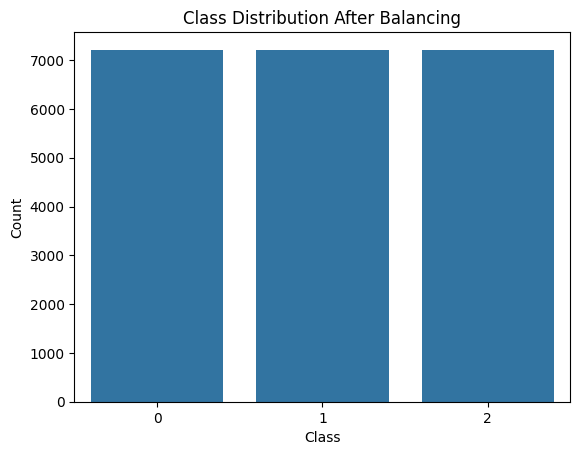

In [28]:
sns.countplot(x=y_balanced)
plt.title('Class Distribution After Balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

step 3: correlation heat map

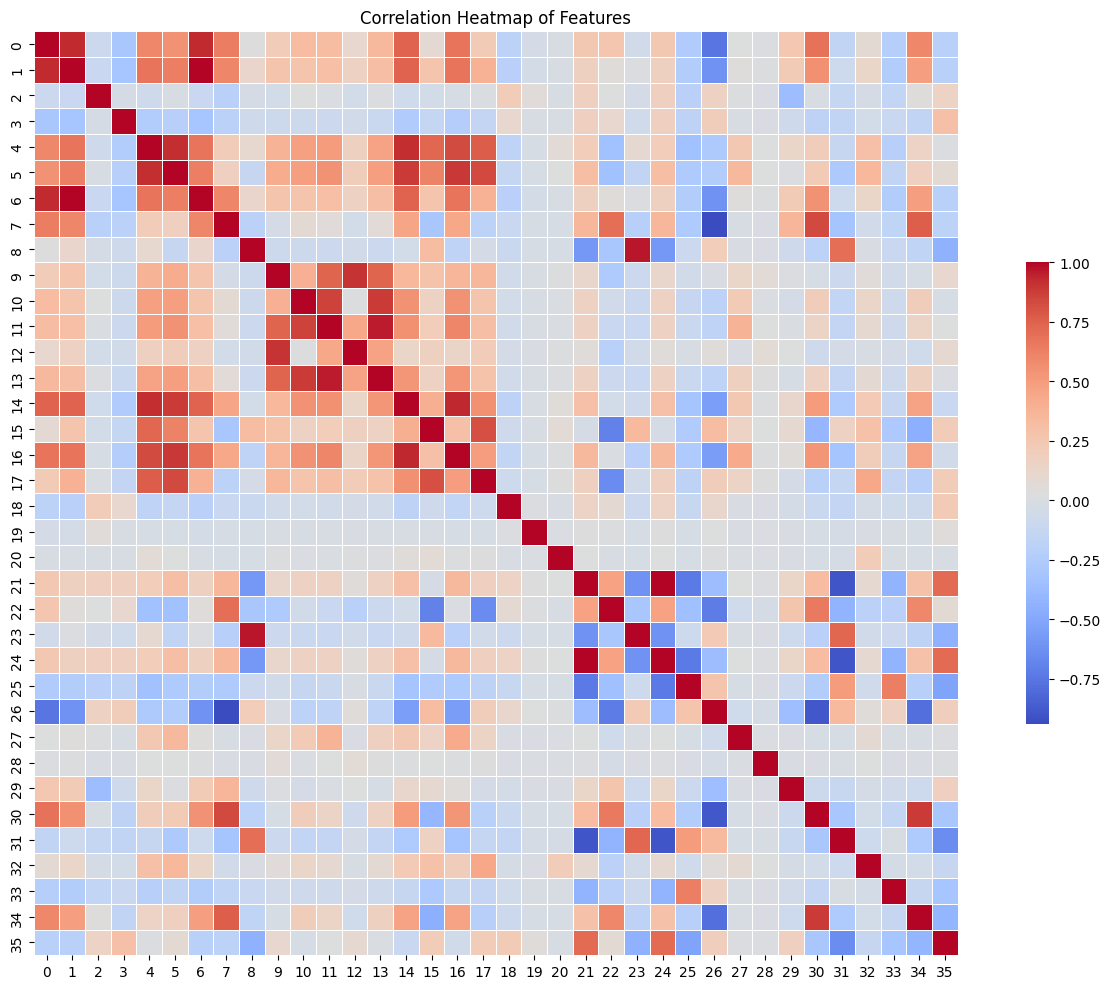

In [30]:
# Assuming X_balanced is your final numeric feature matrix after normalization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# If X_balanced is a NumPy array, convert it to DataFrame
X_df = pd.DataFrame(X_balanced)

# Compute correlation matrix
corr_matrix = X_df.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f',
            linewidths=0.5, square=True, cbar_kws={"shrink": 0.5})
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()


EXPERIMENT 7-8: Apply feature selecetion techniques

step 1: test-train split

In [32]:
from sklearn.model_selection import train_test_split

# X_balanced is already normalized; convert to DataFrame for feature selection
X_df = pd.DataFrame(X_balanced)
y_df = pd.Series(y_balanced)

# Split for wrapper/embedded later
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=42)


I AM APPLYING CHI- SQUAARE METHOD FOR THIS (FILTER METHOD)

In [36]:
from sklearn.feature_selection import SelectKBest, chi2

# Select top 10 features using chi-square
chi2_selector = SelectKBest(score_func=chi2, k=4)
X_chi2 = chi2_selector.fit_transform(X_df, y_df)

# Show selected feature indices
selected_indices = chi2_selector.get_support(indices=True)
print("Selected features by Chi-Square:", selected_indices)


Selected features by Chi-Square: [ 1  6 25 31]


experiment 9-10: applying wrapper methods

I am using recursive feature elimination (WRAPPER METHOD)

In [37]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=4)
rfe.fit(X_train, y_train)

selected_rfe = rfe.get_support(indices=True)
print("Selected features by RFE:", selected_rfe)


Selected features by RFE: [ 0  8 21 24]


experement 11- embedded methods

I AM USING TREE-BASED METHOD (EMBEDDED METHOD)

In [39]:
import numpy as np

# Train a Random Forest and get feature importances
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
top_indices = np.argsort(importances)[-4:]

print("Selected features by Embedded Method (RandomForest):", top_indices)


Selected features by Embedded Method (RandomForest): [16 21  0  8]


experiment 12: using ml calssifiers

i am using logistic regression for this

step 1: importing libraries

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

step 2: now i am training my model

In [41]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200)

step 3: make predictions using the model

In [42]:
y_pred = lr.predict(X_test)

step 4: evaluate the model

In [43]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.9998459642637092

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2184
           1       1.00      1.00      1.00      2177
           2       1.00      1.00      1.00      2131

    accuracy                           1.00      6492
   macro avg       1.00      1.00      1.00      6492
weighted avg       1.00      1.00      1.00      6492


Confusion Matrix:
 [[2183    1    0]
 [   0 2177    0]
 [   0    0 2131]]


I THINK AFTER THIS I HAVE SUCCESFULLY COMPLETED MY MICRO PROJECT OF SKILL LCA- 3